In [1]:
from IPython.display import HTML
from IPython.display import Image
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Exponential growth is a specific way that a quantity may increase over time. It occurs when the instantaneous rate of change (that is, the derivative) of a quantity with respect to time is proportional to the quantity itself. Described as a function, a quantity undergoing exponential growth is an exponential function of time, that is, the variable representing time is the exponent (in contrast to other types of growth, such as quadratic growth).

https://en.wikipedia.org/wiki/Exponential_growth


Below we have a video explaining the exponential growth of the cases the Corona virus.

In [2]:
#Load Youtube video
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/Kas0tIxDvrg" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

/Users/ticu/opt/anaconda3/lib/python3.8/site-packages/IPython/core/display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


<h1>Growth in the number of cases over time</h1>

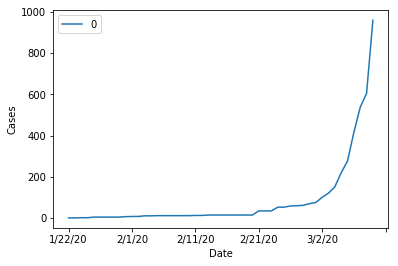

In [3]:
#read Corona virus data

df = pd.read_csv('./time_series_covid_19_confirmed.csv', sep=',')
df = df[df["Country/Region"]=="US"]
df.drop(['Lat', 'Long'], axis=1, inplace=True)
df = df.groupby('Country/Region').sum().reset_index()

df.drop(['Country/Region'], axis=1, inplace=True)

df.T.plot()
plt.xlabel('Date')
plt.ylabel('Cases')

plt.show()

<h1>Data em log scale</h1>

Text(6.675,0.5,'Log(Cases)')

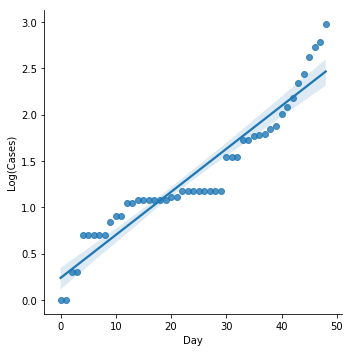

In [4]:
df2 = df.T
df2['date'] = np.arange(0,len(df2))
df2.columns = ['cases', 'date']
df2['cases'] = np.log10(df2['cases'])
sns.lmplot(x = 'date', y='cases', data=df2)
plt.xlabel('Day')
plt.ylabel('Log(Cases)')


Your task as a data scientist is to call bullshit in a recent Trump's tweet were he uses the number of deaths caused by the common flu to dismiss the threat post by the Coronavirus. Use the model described in the video and show how many days until the Coronavirus surpasses the number of deaths caused by the common flu. To compute the mortality of the Coronavirus you can use data from https://www.worldometers.info/coronavirus/

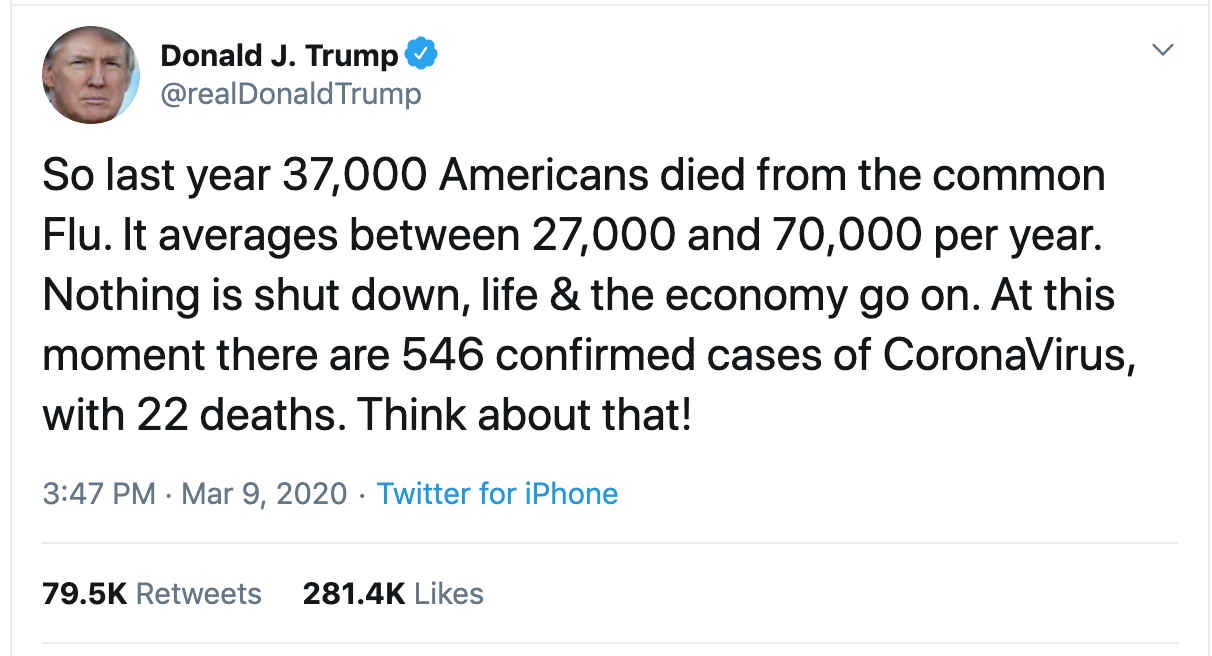

In [5]:
#Load tweet image
Image(filename='Trump_tweet.png')

<h1>Answer</h1>


N0 = 1, check on the first day in the dataframe.

Assuming a mortality of 5% and a growth factor of 1.15. You also can compute the growth factor from the data.

First, computing how many infected persons would be required to produce 37000 deaths at a rate of 5%

In [6]:
#Total number of infected persons to produce 37000 deaths
N = np.ceil((37000 * 100)/5)
print("Total number of cases: {}".format(N))

Total number of cases: 740000.0


Without stopping the exponential growth, the number of days to reach 37000 deaths is: 

In [7]:
print('Number of days: {}'.format(np.ceil(np.log10(N)/np.log10(1.15))))

Number of days: 97.0


<h1>Plotting the curve until 97 days</h1>

Text(0,0.5,'Cases')

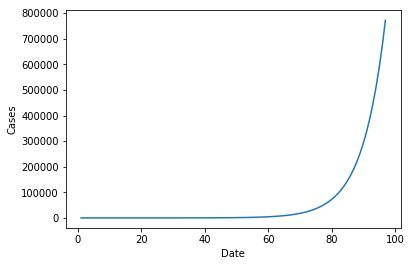

In [8]:
def number_number_cases_day(N0, growth_factor, day):
    Nd = (growth_factor**day)*N0
    return Nd

cases = []

for i in range(1,98):
    cases.append(number_number_cases_day(1, 1.15, i))

plt.plot(range(1,98), cases)
plt.xlabel('Date')
plt.ylabel('Cases')